In [1]:
import pandas as pd

df = pd.read_excel('C:/Users/Aarushi/Desktop/masters dissertation/Book1.xlsx')
df.head()

,identifier,ra,dec,par,e_par,dist,e_dist,pmra,e_pmra,pmdec,e_pmdec,sp_ty,vrad,vrad_e
0,6161311769310004224,201.8110,-40.1626,10.673,0.348,0.093694,0.003055,-17.06,0.27,9.27,0.45,B1IV,14.00,5.02
1,5329291735538142848,129.3756,-47.7594,10.601,0.011,0.094331,0.000098,-3.73,0.01,-21.59,0.01,OB+,-2.39,1.91
2,6235406071207202688,239.7129,-26.1142,9.673,0.696,0.103381,0.007439,-12.40,0.52,-26.21,0.57,B1.5V,-7.40,1.30
3,6093220251160674688,214.8508,-46.0581,9.329,0.532,0.107193,0.006113,-12.52,0.49,-5.15,0.56,B2.5V,21.60,4.10
4,6053327426740164992,184.6090,-64.0031,9.240,0.193,0.108225,0.002261,-37.43,0.20,-6.58,0.25,B2/3V,15.80,0.70


In [2]:
import numpy as np
import sys
from astropy.coordinates import SkyCoord
from astropy import units as u
np.set_printoptions(threshold=sys.maxsize)


rar =df[df.columns[1]].to_numpy()
decc=df[df.columns[2]].to_numpy()
dist=df[df.columns[5]].to_numpy()
pmra=df[df.columns[7]].to_numpy()
pmy =df[df.columns[9]].to_numpy()

# Precession of J2016 to J2000

In [3]:
from PyAstronomy import pyasl
newj=[]
for i in range(2741):
    new = pyasl.asl.astroTimeLegacy.precess(rar[i],decc[i], 2000, 2016, FK4=False, radian=False)
    newj = np.append(newj, new)
    
newc=newj.reshape(2741,2)
ra=newc[:,0]

dec=newc[:,1]

pmx=pmra*np.cos(dec)

# Coordinate Conversions

## Spherical Equitorial -> Spherical Galactic -> Rectangular Galactic

In [4]:
#Spherical Equitorial -> Spherical Galactic
c_icrs = SkyCoord(ra*u.deg, dec*u.deg, pm_ra_cosdec=pmx*u.mas/u.yr, pm_dec=pmy*u.mas/u.yr)
c_galc =c_icrs.galactic

coord_df = pd.DataFrame({"l": c_galc.l.degree, "b": c_galc.b.degree, "pmral":c_galc.pm_l_cosb,"pmrab":c_galc.pm_b})
df=pd.concat([df, coord_df], axis=1)

ra=ra*0.0174533
dec=dec*0.0174533

l=df[df.columns[14]].to_numpy()
l=l*0.0174533
b=df[df.columns[15]].to_numpy()
b=b*0.0174533
pml=df[df.columns[16]].to_numpy()
pmb=df[df.columns[17]].to_numpy()
R0=8.1

#Spherical Galactic -> Rectangular Galactic

brac=dist*np.cos(b)*np.cos(l)
brac1=dist*np.cos(b)*np.sin(l)
brac2=dist*np.sin(b)
dis2=(brac-R0)**2 + (brac1)**2 +(brac2)**2
R=dis2**0.5



x=dist*np.cos(l)*np.cos(b)
y=dist*np.sin(l)*np.cos(b)
z=dist*np.sin(b)

df.head()

,identifier,ra,dec,par,e_par,dist,e_dist,pmra,e_pmra,pmdec,e_pmdec,sp_ty,vrad,vrad_e,l,b,pmral,pmrab
0,6161311769310004224,201.8110,-40.1626,10.673,0.348,0.093694,0.003055,-17.06,0.27,9.27,0.45,B1IV,14.00,5.02,310.487168,22.086940,15.377903,6.995146
1,5329291735538142848,129.3756,-47.7594,10.601,0.011,0.094331,0.000098,-3.73,0.01,-21.59,0.01,OB+,-2.39,1.91,265.942397,-4.005922,18.949180,-10.737955
2,6235406071207202688,239.7129,-26.1142,9.673,0.696,0.103381,0.007439,-12.40,0.52,-26.21,0.57,B1.5V,-7.40,1.30,347.348995,20.047116,-22.813994,-14.413609
3,6093220251160674688,214.8508,-46.0581,9.329,0.532,0.107193,0.006113,-12.52,0.49,-5.15,0.56,B2.5V,21.60,4.10,318.622816,14.011593,4.625715,-7.205130
4,6053327426740164992,184.6090,-64.0031,9.240,0.193,0.108225,0.002261,-37.43,0.20,-6.58,0.25,B2/3V,15.80,0.70,299.431398,-1.438665,-10.538713,-7.952436


# Galactic and Space Velocities

In [5]:
Vr=df[df.columns[12]].to_numpy()
Vl=4.74*dist*pml
Vb=4.74*dist*pmb

U=Vr*np.cos(l)*np.cos(b)-Vl*np.sin(l)-Vb*np.cos(l)*np.sin(b)
V=Vr*np.sin(l)*np.cos(b)+Vl*np.cos(l)-Vb*np.sin(l)*np.sin(b)
W=Vr*np.sin(b)+Vb*np.cos(b)

# Circular Velocity

In [6]:
sinT=[]
cosT=[]
tanT=[]

tanT=y/(R0-x)
tanT2=tanT**2

sinT1=tanT2/(1+tanT2)
sinT=sinT1**0.5
cosT1=1/(1+tanT2)
cosT=cosT1**0.5


V0=236.7

Vcirr=(U*sinT)+((V0+V)*cosT)

In [7]:
data = pd.DataFrame({'R':R,'x':x,'y':y,'z':z,'vl':Vl,'vb':Vb,'U':U, 'V':V, 'sinT':sinT,'cosT':cosT, 'Vcir':Vcirr})
#data.to_excel('exampletry.xlsx')
#data.head()
df=pd.concat([df, data], axis=1)
df.head()
#dfc.to_excel('allgaian.xlsx')

,identifier,ra,dec,par,e_par,dist,e_dist,pmra,e_pmra,pmdec,...,x,y,z,vl,vb,U,V,sinT,cosT,Vcir
0,6161311769310004224,201.8110,-40.1626,10.673,0.348,0.093694,0.003055,-17.06,0.27,9.27,...,0.056369,-0.066030,0.035230,6.829501,3.106623,12.858576,-4.543633,0.008209,0.999966,232.254098
1,5329291735538142848,129.3756,-47.7594,10.601,0.011,0.094331,0.000098,-3.73,0.01,-21.59,...,-0.006658,-0.093864,-0.006590,8.472702,-4.801236,8.643895,2.113251,0.011578,0.999933,238.897322
2,6235406071207202688,239.7129,-26.1142,9.673,0.696,0.103381,0.007439,-12.40,0.52,-26.21,...,0.094759,-0.021269,0.035438,-11.179399,-7.063011,-6.868897,-9.915774,0.002657,0.999996,226.765175
3,6093220251160674688,214.8508,-46.0581,9.329,0.532,0.107193,0.006113,-12.52,0.49,-5.15,...,0.078042,-0.068747,0.025953,2.350293,-3.660876,17.944553,-12.675326,0.008570,0.999963,224.170225
4,6053327426740164992,184.6090,-64.0031,9.240,0.193,0.108225,0.002261,-37.43,0.20,-6.58,...,0.053163,-0.094228,-0.002717,-5.406223,-4.079497,3.002561,-16.323892,0.011709,0.999931,220.396158


In [8]:
Vcir=df[df.columns[28]].to_numpy()
s3min,s3max =  [Vcir.mean() - 3 * Vcir.std(), Vcir.mean() + 3 * Vcir.std()]

dfmin = df[df["Vcir"] > 133.8782924517447]
df = dfmin[dfmin["Vcir"] < 309.0400027519576]


df=df.sort_values('R')


R = df[df.columns[18]].to_numpy()
Vc = df[df.columns[28]].to_numpy()

df

,identifier,ra,dec,par,e_par,dist,e_dist,pmra,e_pmra,pmdec,...,x,y,z,vl,vb,U,V,sinT,cosT,Vcir
2716,4155344545012059520,280.8738,-9.3202,0.204,0.016,4.901961,0.384468,-0.15,0.02,-3.40,...,4.478630,1.979601,-0.228639,-68.778400,-39.019231,70.909422,-43.854872,0.479656,0.877456,203.225351
2637,4064744821252009984,273.1712,-25.6424,0.250,0.023,4.000000,0.368000,-1.58,0.03,-3.18,...,3.969754,0.414760,-0.262733,-65.511481,-5.583134,4.180093,-65.431339,0.099918,0.994996,170.829249
2697,5990553112435282944,245.5677,-44.9360,0.215,0.018,4.651163,0.389400,-3.41,0.02,-3.51,...,4.286907,-1.784999,0.263664,-84.041683,-24.998394,53.567804,-113.340790,0.423969,0.905677,134.434651
2701,5933972622078503552,246.3859,-52.0247,0.213,0.017,4.694836,0.374705,-1.28,0.02,-4.03,...,4.169650,-2.150764,-0.172382,-60.086018,-66.876524,-75.910103,-28.452994,0.480045,0.877244,146.243148
2582,4069585661644839808,271.3572,-23.0057,0.282,0.014,3.546099,0.176047,-0.75,0.02,-2.37,...,3.515372,0.461303,-0.064673,-31.518821,-25.260980,1.661424,-31.571018,0.100114,0.994976,204.264741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,3028320387461899648,112.7874,-15.9439,0.169,0.013,5.917160,0.455166,-1.42,0.01,1.62,...,-3.664740,-4.643400,0.145926,-21.342602,55.514665,-55.419156,-35.769010,0.367127,0.930171,166.554262
2714,271963002839779712,66.3627,52.0438,0.204,0.014,4.901961,0.336409,-0.18,0.02,-0.83,...,-4.352666,2.247450,0.180250,14.561768,-12.684255,17.145643,-25.241295,0.177610,0.984101,211.141951
2726,3107222574518186624,100.4610,-1.5050,0.188,0.016,5.319149,0.452694,-0.38,0.01,0.58,...,-4.441773,-2.916097,-0.245708,-13.234745,6.237781,-80.529678,-37.036995,0.226470,0.974018,176.237869
2727,3112496794360485248,103.8202,-0.5207,0.187,0.017,5.347594,0.486145,-0.68,0.02,0.44,...,-4.435763,-2.985856,0.073682,-16.660272,-8.051343,-63.394905,-22.590062,0.231705,0.972786,193.594252


In [9]:
df.R

2716     4.133451
2637     4.159325
2697     4.218461
2701     4.483654
2582     4.608232
          ...    
2732    12.648777
2714    12.655133
2726    12.878667
2727    12.886664
2740    13.635996
Name: R, Length: 2691, dtype: float64

# Error Calculation

In [10]:
import numpy as np
import math as m

a=np.zeros(2691)
Ag=np.array([[-0.0548755604162154,-0.8734370902348850,-0.4838350155487132],
            [  0.4941094278755837,-0.4448296299600112, 0.7469822444972189],
            [ -0.8676661490190047,-0.1980763734312015, 0.4559837761750669]], dtype=np.float64)
Ag=Ag.transpose()

ep=df[df.columns[4]].to_numpy()
epmra=df[df.columns[8]].to_numpy()
epmdec=df[df.columns[10]].to_numpy()
g=[[1],[1],[1],[1],[1]]

for i in range(2691):

    galc= np.array([[-m.sin(l[i]), -m.cos(l[i])*m.sin(b[i])],
                    [ m.cos(l[i]), -m.sin(l[i])*m.sin(b[i])],
                    [        a[i],             m.cos(b[i])]], dtype=np.float64)
    galc=galc.transpose()

    icrs= np.array([[-m.sin(ra[i]), -m.cos(ra[i])*m.sin(dec[i])],
                    [ m.cos(ra[i]), -m.sin(ra[i])*m.sin(dec[i])],
                    [         a[i],              m.cos(dec[i])]], dtype=np.float64)

    G=galc.dot(Ag).dot(icrs)

    J=np.array([[G[0][0],G[0][1],0,      0,      0],
               [ G[1][0],G[1][1],0,      0,      0],
               [       0,      0,1,      0,      0],
               [       0,      0,0,G[0][0],G[0][1]],
               [       0,      0,0,G[1][0],G[1][1]]],dtype=np.float64)

    
    e=[[a[i]],[a[i]],[ep[i]],[epmra[i]],[epmdec[i]]]

    t=J.dot(e)
    g=np.append(g,t,axis=1)

In [11]:
g=g.transpose()

e_data = pd.DataFrame(g, columns=['e_l','e_b','e_par','e_pml','e_pmb'])
e_data = e_data.iloc[1: , :]
e_data

,e_l,e_b,e_par,e_pml,e_pmb
1,0.0,0.0,0.016,-0.011350,0.001488
2,0.0,0.0,0.023,-0.015677,0.014164
3,0.0,0.0,0.018,-0.012279,-0.002716
4,0.0,0.0,0.017,-0.009630,-0.005847
5,0.0,0.0,0.014,-0.004635,-0.010424
...,...,...,...,...,...
2687,0.0,0.0,0.013,-0.010473,0.008747
2688,0.0,0.0,0.014,-0.003011,0.017935
2689,0.0,0.0,0.016,-0.011587,0.008105
2690,0.0,0.0,0.017,-0.006416,0.009527


In [12]:
#df.to_excel('allR.xlsx')

In [13]:
Vr=df[df.columns[12]].to_numpy()
Vl=df[df.columns[22]].to_numpy()
sinT=df[df.columns[26]].to_numpy()
cosT=df[df.columns[27]].to_numpy()
Vb=df[df.columns[23]].to_numpy()

dist=df[df.columns[5]].to_numpy()

l=df[df.columns[14]].to_numpy()
b=df[df.columns[15]].to_numpy()
pml=df[df.columns[16]].to_numpy()
pmb=df[df.columns[17]].to_numpy()
e_dist=df[df.columns[6]].to_numpy()
e_pml=e_data[e_data.columns[3]].to_numpy()
e_pmb=e_data[e_data.columns[4]].to_numpy()
e_l=e_data[e_data.columns[0]].to_numpy()
e_b=e_data[e_data.columns[1]].to_numpy()
e_Vr=df[df.columns[13]].to_numpy()
e_Vr=np.nan_to_num(e_Vr) 
Vc=df[df.columns[28]].to_numpy()

In [14]:
dist=df[df.columns[5]].to_numpy()

e_Vl= np.sqrt((4.74*pml*e_dist)**2 + (4.74*dist*e_pml)**2)
e_Vb= np.sqrt((4.74*pmb*e_dist)**2 + (4.74*dist*e_pmb)**2)

e_U= np.sqrt((np.cos(l)*np.cos(b)*e_Vr)**2 + (np.sin(l)*e_Vl)**2 + (np.cos(l)*np.sin(b)*e_Vb)**2 + ( (-Vr*np.cos(b)*np.sin(l)-Vl*np.cos(l)+Vb*np.sin(b)*np.sin(l) )*e_l)**2 + ((-Vr*np.cos(l)*np.sin(b)-Vb*np.cos(l)*np.cos(b) )*e_b)**2)
e_V= np.sqrt((np.sin(l)*np.cos(b)*e_Vr)**2 + (np.cos(l)*e_Vl)**2 + (np.sin(l)*np.sin(b)*e_Vb)**2 + ( (Vr*np.cos(b)*np.cos(l)-Vl*np.sin(l)-Vb*np.sin(b)*np.cos(l) )*e_l)**2 + ((-Vr*np.sin(l)*np.sin(b)+Vb*np.sin(l)*np.cos(b) )*e_b)**2)
e_V0=np.ones(2691)*3.3

e_Vc =np.sqrt(  (sinT*e_U)**2 + (cosT*e_V0)**2 + (cosT*e_V)**2  ) 

R01=np.ones(2691)*R0




br=(2*e_dist*((dist*np.cos(b)*np.cos(l)-R01)*np.cos(b)*np.cos(l) + dist*(np.cos(b)*np.sin(l))**2 + dist*np.sin(b)**2)   )**2
br1=(2*e_dist*(dist*np.cos(b)*np.cos(l)-R0))**2
br2=(dist*np.cos(b)*np.cos(l)-R0)**2 + (dist*np.cos(b)*np.sin(l*0.0174533))**2 +(dist*np.sin(b))**2
e_R= (0.5*R*np.sqrt( (br)  +  (br1)))/br2

In [15]:
f_data = pd.DataFrame({'e_vR':e_Vl,'e_vb':e_Vb,'e_U':e_U,'e_V':e_V,'e_V0':e_V0,'e_Vc':e_Vc})
e_data=pd.concat([e_data, f_data], axis=1)
e_data.head()
#e_data.to_excel('allerror.xlsx')

,e_l,e_b,e_par,e_pml,e_pmb,e_vR,e_vb,e_U,e_V,e_V0,e_Vc
1,0.0,0.0,0.016,-0.011350,0.001488,6.034381,0.579616,1.917200,5.731749,3.3,6.583535
2,0.0,0.0,0.023,-0.015677,0.014164,7.041253,2.093745,8.394143,15.185804,3.3,14.517397
3,0.0,0.0,0.018,-0.012279,-0.002716,4.800384,5.339149,5.216948,4.840146,3.3,5.716709
4,0.0,0.0,0.017,-0.009630,-0.005847,1.566703,1.266272,1.511137,1.170710,3.3,3.487200
5,0.0,0.0,0.014,-0.004635,-0.010424,3.929244,5.448405,4.221398,5.596099,3.3,6.112924


In [16]:
import pandas as pb
dfs=pb.read_csv('C:\\Users\\Aarushi\\Desktop\\masters dissertation\\rot_curve.csv')
dfs.head()


,distance,velocity,error,distance1,velocity1,distance2,velocity2,distance3,velocity3,error3,distance4,velocity4,error4,distance5,velocity5,error5
0,5.69,235.5,17.8,0.08029,200.89999,0.00,204.20000,0.20,233.00,13.32,0.19,231.95,13.13,0.19,227.21,9.95
1,6.81,242.9,0.8,0.15856,206.60001,0.06,207.13058,0.38,268.92,4.67,0.36,266.93,4.51,0.35,265.17,8.81
2,7.95,251.1,0.7,0.23885,212.20000,0.13,230.93294,0.66,250.75,11.35,0.65,246.89,10.60,0.63,252.45,13.31
3,9.08,262.0,2.1,0.31713,220.20000,0.19,247.86353,1.61,217.83,5.81,1.62,205.73,5.80,1.63,212.09,6.10
4,10.22,258.9,6.9,0.39741,221.70000,0.25,251.69411,2.57,219.58,1.48,2.61,199.91,1.60,2.56,211.79,1.52


In [17]:
SVc=dfs[dfs.columns[4]].to_numpy()
Sd=dfs[dfs.columns[3]].to_numpy()

[[Model]]
    Model(poly)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 2691
    # variables        = 4
    chi-square         = 1435414.91
    reduced chi-square = 534.207259
    Akaike info crit   = 16905.5865
    Bayesian info crit = 16929.1771
[[Variables]]
    a:  0.74372248 +/- 0.07415359 (9.97%) (init = 0.8)
    b: -20.9446561 +/- 1.90688354 (9.10%) (init = -20)
    c:  185.495115 +/- 16.0830822 (8.67%) (init = 10)
    d: -298.008325 +/- 44.5556336 (14.95%) (init = -30)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.996
    C(b, c) = -0.995
    C(c, d) = -0.994
    C(a, c) = 0.982
    C(b, d) = 0.980
    C(a, d) = -0.957


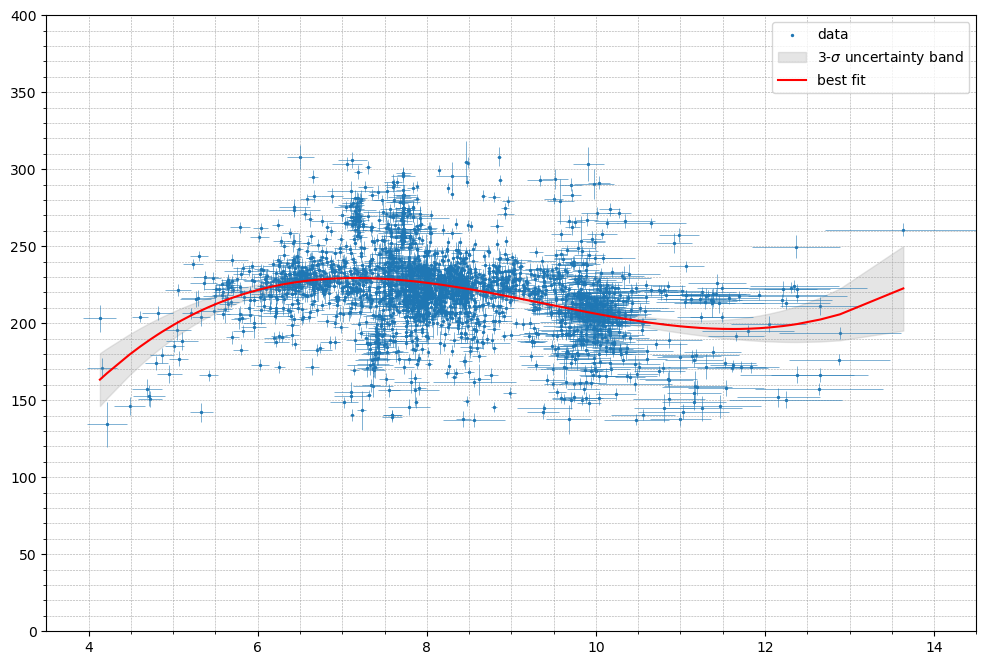

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator
from lmfit import Model

fig=plt.figure()
ax=fig.gca()
fig.set_figwidth(12)
fig.set_figheight(8)



#scatter data with error
plt.scatter(R, Vc, label='data',s=2)
plt.errorbar(R, Vc, yerr=e_Vc, xerr=e_R, linestyle='',elinewidth=0.4)

#making model
def poly(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

gmodel= Model(poly)
result= gmodel.fit(Vc,x=R, a=0.8,b=-20,c=10,d=-30)
print(result.fit_report())


#sigmaerrorfit
dely = result.eval_uncertainty(sigma=3)
plt.fill_between(R, result.best_fit-dely, result.best_fit+dely, color="#ABABAB",label='3-$\sigma$ uncertainty band',alpha=0.3)


plt.plot(R,result.best_fit, '-',label='best fit',color='red')



#plt.plot(R, poly(R, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
#plt.plot(R, poly(R, *popt1), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.ylim([0,400])
plt.xlim([3.5,14.5])
plt.legend()
plt.grid(visible=True, which='both', color='0.65', linestyle='--',linewidth=0.4)

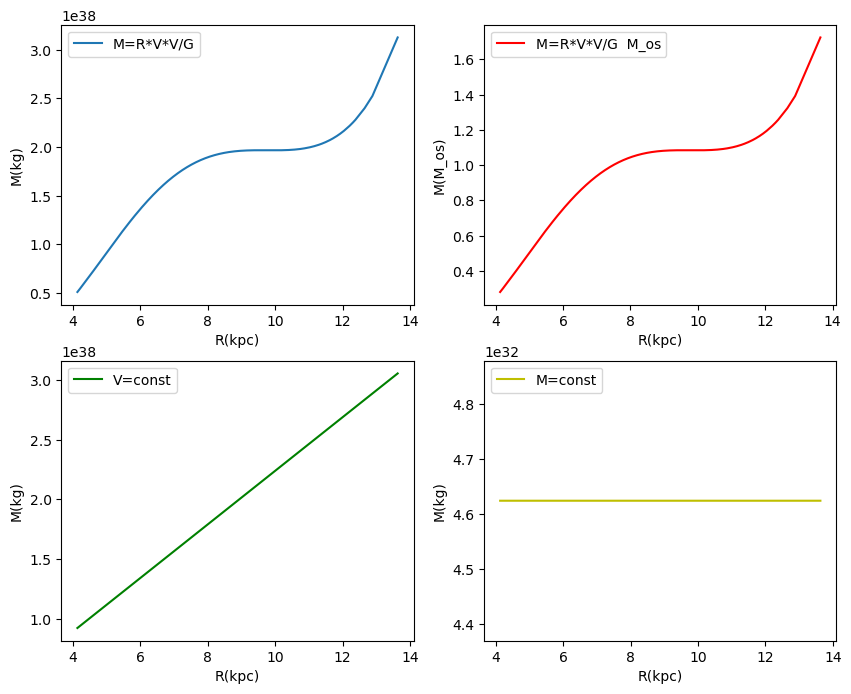

In [81]:
G=6.67408*(10**(-11))
C=3.086*(10**(22))
Cs=2.55*(10**(-6))
Ct=2.239*(10**(37))

y=0.74372257*R**3-20.9446584*R**2+185.495134*R-298.008377

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 8))

#fig.set_size_inches(20, 4)


M=C*R*y*y/G
ax1.plot(R,M, label="M=R*V*V/G")
ax1.legend(loc='upper left')
ax1.set(xlabel='R(kpc)', ylabel='M(kg)')

Ms=Cs*R*y*y
ax2.plot(R,Ms,c='r',label="M=R*V*V/G  M_os")
ax2.legend(loc='upper left')
ax2.set(xlabel='R(kpc)', ylabel='M(M_os)')

vco=220
Mvco=Ct*R
ax3.plot(R,Mvco,c='g',label="V=const")
ax3.set(xlabel='R(kpc)', ylabel='M(kg)')
ax3.legend(loc='upper left')

Mco=(C*R)/(R*G)
ax4.plot(x,Mco,c='y',label="M=const")
ax4.set(xlabel='R(kpc)', ylabel='M(kg)')
ax4.legend(loc='upper left')

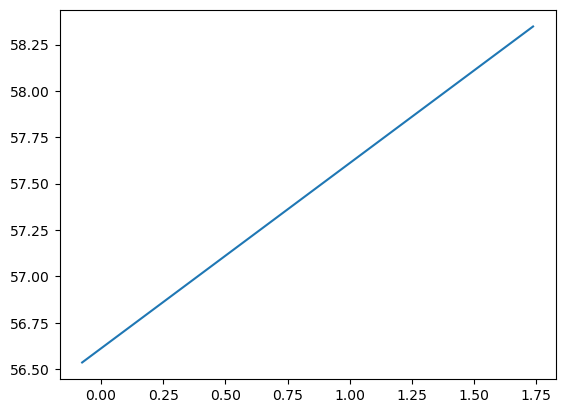

In [82]:
M=C*R*y*y/G
yy=np.log(M)-30.29
xx=np.log(R)-0.9
c=2*(np.log(y)-np.log(220))

plt.plot(xx+c,yy)